# Reuse data exploration



## Data and packages

In [11]:
import json
import numpy as np
import pandas as pd

In [12]:
# data

path= "C:/Users/telmi/Documents/dhh23/EarlyModernReuse/early_modern_data-main/"

# C:\Users\telmi\Documents\dhh23\reuseportfolio
meta = path + "metadata.csv"
clip= path + "clip_classification.csv"

meta = pd.read_csv(meta, dtype={"page_id":str, "ecco_id":str})
clip = pd.read_csv(clip)

# similarity data
dpath="../../data/botanical_similarity_with_metadata.csv"
dpath="C:/Users/telmi/Documents/dhh23/image-similarity-detection/code/datanew.csv"

print(dpath)
df= pd.read_csv(dpath)
df.head()

C:/Users/telmi/Documents/dhh23/image-similarity-detection/code/datanew.csv


original_image          similar_image  similarity_score
0  049030010304390_2.png  049030010306110_3.png          0.916535
1  049030010304390_2.png  064340010200770_4.png          0.910169
2  049030010304390_2.png  049030010300880_2.png          0.905190
3  049030010304390_2.png  049030010207390_3.png          0.900482
4  049030010202250_0.png  049030010207560_0.png          0.908386

In [13]:
# pickled files

import pickle
from PIL import Image

similarNames_path = "C:/Users/telmi/Documents/dhh23/image-similarity-detection/similar_names.pkl"
similarValues_path = "C:/Users/telmi/Documents/dhh23/image-similarity-detection/similar_values.pkl"

# open a file where you stored the pickled data
file = open(similarNames_path, 'rb')
simNames = pickle.load(file)
file.close()

file = open(similarValues_path, 'rb')
simValues = pickle.load(file)
file.close()

In [14]:
# see all metadata columns
meta.columns 

# relevant columns:
# ["page_id","ecco_id","work_id", "ecco_full_title","gatherings","publication_year","publication_decade","document_type","authors","sub_category"]

Index(['page_id', 'ecco_id', 'page_number', 'caption_texts', 'estc_id',
       'ecco_full_title', 'number_of_pages', 'language_primary', 'gatherings',
       'publication_year', 'publication_decade', 'work_id',
       'publication_place', 'publication_country', 'document_type',
       'sub_category', 'authors'],
      dtype='object')

In [15]:
from utils import *


In [16]:

# rename columns
clip=clip.rename(columns={"Image": "original_image"})


# new column for page id from the image file name
clip["page_id"] = clip["original_image"].apply(lambda x: x.split("_")[0])
df["page_id"] = df["original_image"].apply(lambda x: x.split("_")[0])
df["page_id2"] = df["similar_image"].apply(lambda x: x.split("_")[0])

# merge classification data with metadata

data=df.merge(clip)

data=data[data["Score"]>50]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5027 entries, 0 to 6075
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   original_image    5027 non-null   object 
 1   similar_image     5027 non-null   object 
 2   similarity_score  5027 non-null   float64
 3   page_id           5027 non-null   object 
 4   page_id2          5027 non-null   object 
 5   Category          5027 non-null   object 
 6   Score             5027 non-null   float64
 7   Second_choice     5027 non-null   object 
 8   2ndScore          5027 non-null   float64
dtypes: float64(3), object(6)
memory usage: 392.7+ KB


In [17]:
# relevant metadata
cols= ["page_id","ecco_id","work_id", "ecco_full_title","gatherings","publication_year","publication_decade","document_type","authors","sub_category"]

meta_sub = meta[cols]

data=data.merge(meta_sub, on ="page_id", how="left")

In [18]:
# add metadata for the reused pics
data=data.merge(meta_sub, left_on ="page_id2", right_on="page_id", how="left", suffixes=["","_2"])

# sort so that you see what the source is
data1= data[data["publication_year"]<data["publication_year_2"]] # _2 = where is the original pic reused
data2= data[data["publication_year"]>=data["publication_year_2"]] # _2 = where reuse comes from

print(len(data1),len(data2))

1306 3701


In [19]:
# filter data so that it does not contain reprints (the same work id)

newprints=data[data["work_id"]!=data["work_id_2"]]

# convert to numeric 
newprints["similarity_score"] = pd.to_numeric(newprints["similarity_score"])

C:\Users\telmi\AppData\Local\Temp\ipykernel_2900\1961390881.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newprints["similarity_score"] = pd.to_numeric(newprints["similarity_score"])


In [20]:
print(len(newprints.drop_duplicates(["original_image","similar_image"])),len(newprints))
newprints=newprints.drop_duplicates(["original_image","similar_image"])

1812 1812


## Part 1 - Quality evaluation

First, I wanted to evaluate whether the results from the reuse detection algorithm were reliable.

Threshold: 0.9
Plotting similar images for 120040010101200_0.png


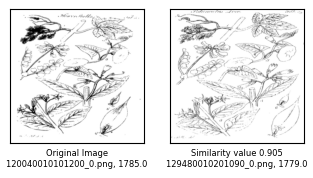

Plotting similar images for 049030010306940_2.png


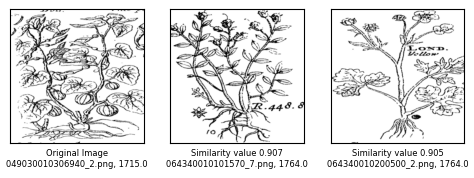

Plotting similar images for 021830030305140_6.png


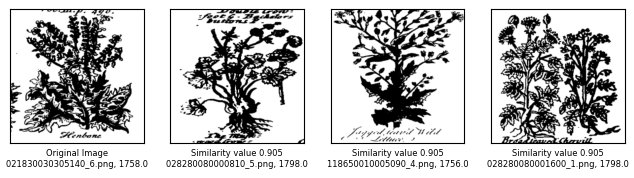

Plotting similar images for 049030010207430_3.png


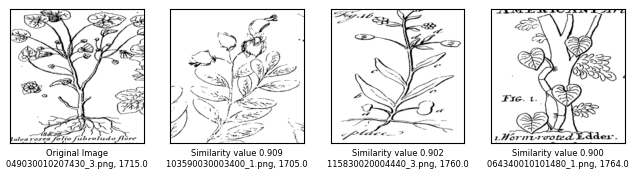

Plotting similar images for 068230010008220_0.png


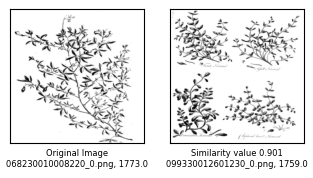

Threshold: 0.91
Plotting similar images for 110220030503260_0.png


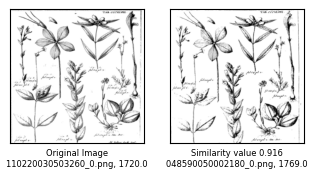

Plotting similar images for 046120011100310_0.png


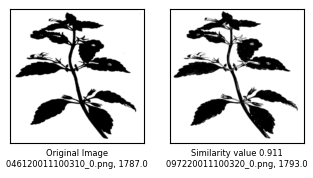

Plotting similar images for 129480040000720_2.png


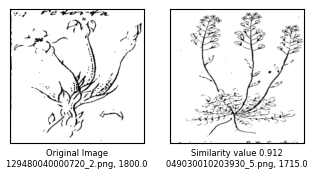

Plotting similar images for 054920030000850_0.png


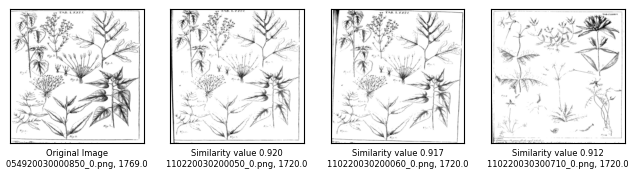

Plotting similar images for 049030010203770_3.png


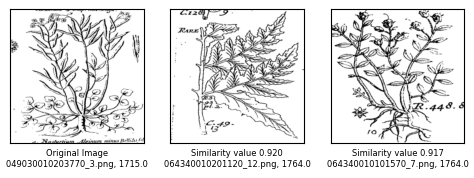

Threshold: 0.92
Plotting similar images for 049030010203830_3.png


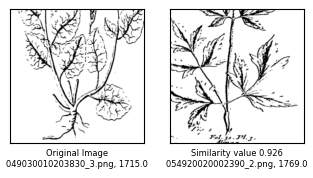

Plotting similar images for 103590030003120_0.png


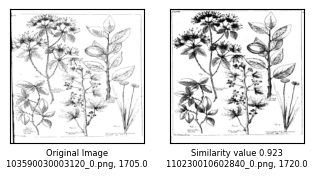

Plotting similar images for 054920020002350_0.png


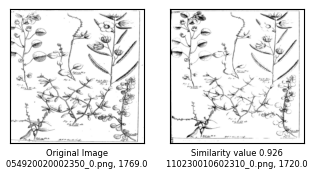

Plotting similar images for 068230010008130_0.png


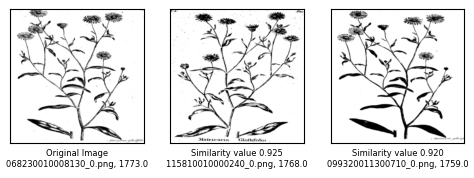

Plotting similar images for 115480030200640_0.png


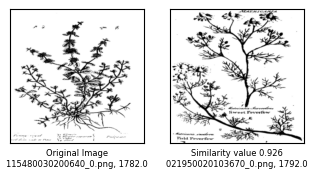

Threshold: 0.93
Plotting similar images for 054890030003930_0.png


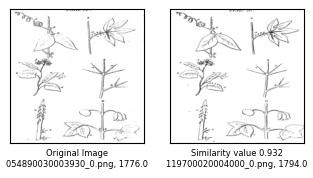

Plotting similar images for 110220030100320_0.png


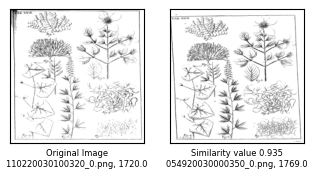

Plotting similar images for 082460030000690_0.png


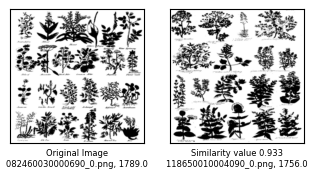

Plotting similar images for 054920030002350_0.png


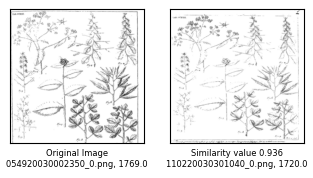

Plotting similar images for 019580120003850_0.png


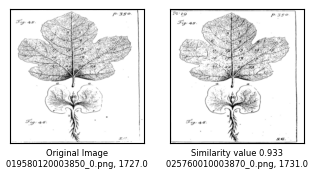

Threshold: 0.94
Plotting similar images for 049130040003690_0.png


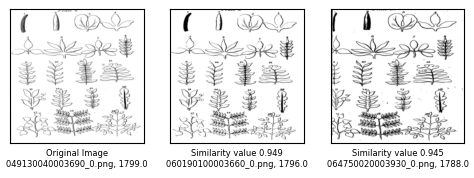

Plotting similar images for 112000120000660_0.png


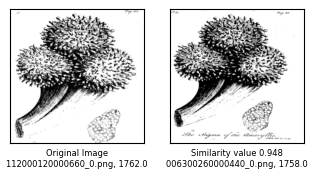

Plotting similar images for 103590030002830_0.png


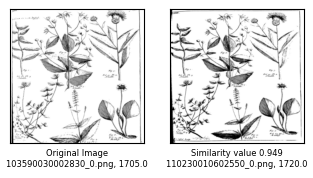

Plotting similar images for 054920020002770_0.png


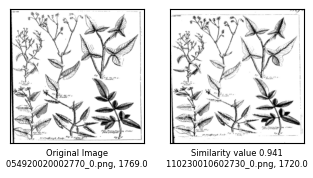

Plotting similar images for 103590030002640_0.png


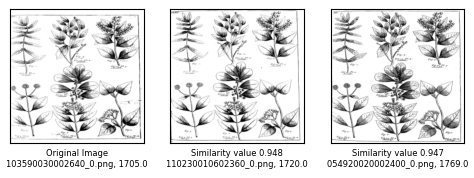

Threshold: 0.95
Plotting similar images for 103590030002730_0.png


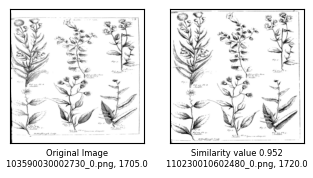

Plotting similar images for 054920020002720_0.png


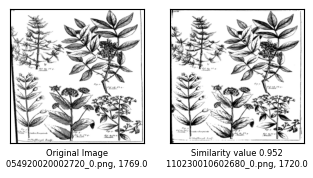

Plotting similar images for 110230010602680_0.png


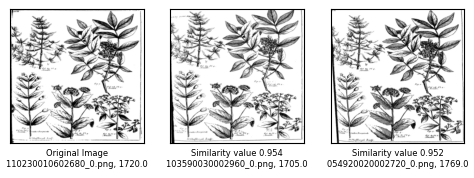

Plotting similar images for 054890030003930_0.png


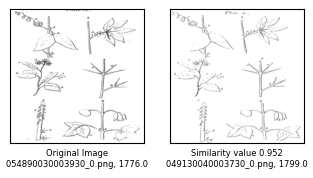

Plotting similar images for 054920020002770_0.png


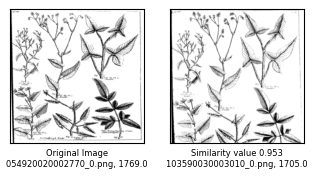

Threshold: 0.96
Plotting similar images for 082460030001690_0.png


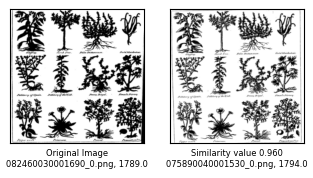

Plotting similar images for 110220030503030_0.png


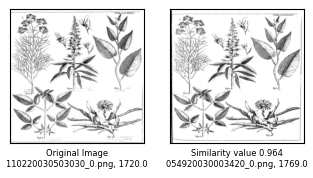

Plotting similar images for 110230010602470_0.png


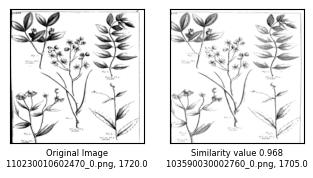

Plotting similar images for 006300240000500_1.png


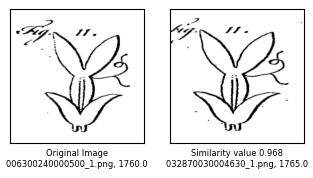

Plotting similar images for 103590030002360_0.png


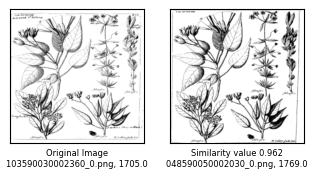

In [22]:
# plot the most reused image

inputDir="C:/Users/telmi/Documents/dhh23/image-similarity-detection/res"

# plot similar images for different thresholds to see how well they match

for ts in [0.9,0.91,0.92,0.93,0.94,0.95,0.96]:
    # filter data
    temp = newprints.drop_duplicates(["original_image","similar_image"])[(newprints["similarity_score"] >= ts) & (newprints["similarity_score"] < (ts+0.01))]
    print("Threshold:", ts)               
    for ix in temp.sample(5)["original_image"]:
        print("Plotting similar images for" , ix)
        plotImages(ix,inputDir,temp)


It seems that a similarity score above 0.91 gives results that are mostly cases of reuse of the same picture.

In [23]:
# double-checking

# subset
df91 = newprints[newprints["similarity_score"]>=0.91]
df91

original_image          similar_image  similarity_score   
1     049030010304390_2.png  064340010200770_4.png          0.910169  \
6     103590030002610_0.png  110230010602330_0.png          0.949483   
7     103590030002610_0.png  054920020002370_0.png          0.947986   
27    110220030100150_0.png  054920030000170_0.png          0.919521   
31    097220010100680_0.png  046120010100660_0.png          0.938755   
...                     ...                    ...               ...   
4996  110220030100690_0.png  054920030000720_0.png          0.935344   
5002  054920020003190_1.png  103590030003420_1.png          0.921296   
5009  110230010603150_1.png  103590030003430_1.png          0.911278   
5022  129440020001130_1.png  115480030101370_0.png          0.924676   
5023  129440020001130_1.png  049030010203790_3.png          0.916789   

              page_id         page_id2   Category      Score Second_choice   
1     049030010304390  064340010200770  botanical  90.966797        animal  \
6     103590030002610  110230010602330  botanical  53.906250        animal   
7     103590030002610  054920020002370  botanical  53.906250        animal   
27    110220030100150  054920030000170  botanical  64.550781        animal   
31    097220010100680  046120010100660  botanical  68.945312        animal   
...               ...              ...        ...        ...           ...   
4996  110220030100690  054920030000720  botanical  51.806641        animal   
5002  054920020003190  103590030003420  botanical  53.857422        animal   
5009  110230010603150  103590030003430  botanical  66.894531        animal   
5022  129440020001130  115480030101370  botanical  70.263672        animal   
5023  129440020001130  049030010203790  botanical  70.263672        animal   

       2ndScore     ecco_id  ...        page_id_2   ecco_id_2   
1      6.695557  0490300103  ...  064340010200770  0643400102  \
6     40.673828  1035900300  ...  110230010602330  1102300106   
7     40.673828  1035900300  ...  054920020002370  0549200200   
27    31.469727  1102200301  ...  054920030000170  0549200300   
31    19.750977  0972200101  ...  046120010100660  0461200101   
...         ...         ...  ...              ...         ...   
4996  29.516602  1102200301  ...  054920030000720  0549200300   
5002  40.039062  0549200200  ...  103590030003420  1035900300   
5009  31.591797  1102300106  ...  103590030003430  1035900300   
5022  27.514648  1294400200  ...  115480030101370  1154800301   
5023  27.514648  1294400200  ...  049030010203790  0490300102   

                                              work_id_2   
1     102916-jacobi petiveri opera historiam natural...  \
6     158152-leonardi plukenetii md opera omnia bota...   
7      158150-leonardi plukenetii amaltheum botanicum i   
27    158153-leonardi plukenetii phytographia sive s...   
31                                            X-T153227   
...                                                 ...   
4996  158153-leonardi plukenetii phytographia sive s...   
5002  158151-leonardi plukenetii amaltheum botanicum...   
5009  158151-leonardi plukenetii amaltheum botanicum...   
5022  8933-a curious herbal containing five hundred ...   
5023  8252-plantarum historiae universalis oxoniensi...   

                                      ecco_full_title_2  gatherings_2   
1     Jacobi Petiveri Opera, historiam naturalem spe...           NaN  \
6     Leonardi Plukenetii, M.D. Opera omnia botanica...           NaN   
7     Leonardi Plukenetii amaltheum botanicum. (i.e....           4to   
27    Leonardi Plukenetii phytographia, sive stirpiu...           4to   
31    The botanical Magazine; or, Flower-Garden Disp...           8vo   
...                                                 ...           ...   
4996  Leonardi Plukenetii phytographia, sive stirpiu...           4to   
5002  Leonardi Plukenetii Amaltheum botanicum (i.e.)...           2fo   
5009  Leonardi Plukenetii Amaltheum botanicum (i.e.)...         

Plotting similar images for 049030010305900_2.png


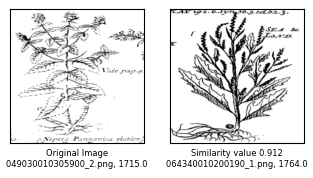

Plotting similar images for 006300240000510_0.png


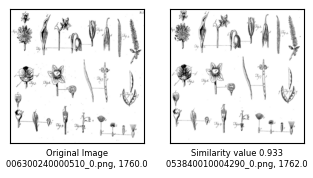

Plotting similar images for 097220010600480_0.png


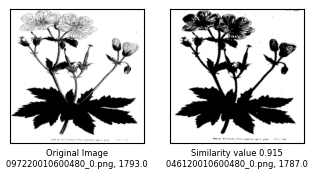

Plotting similar images for 110230010602630_1.png


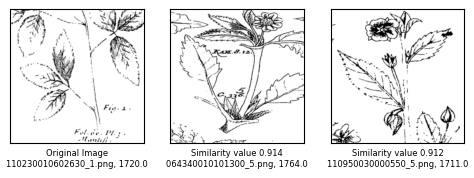

Plotting similar images for 077650070601690_0.png


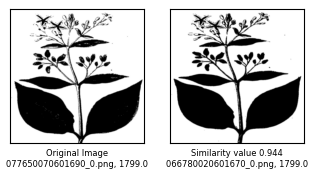

Plotting similar images for 097220011100170_0.png


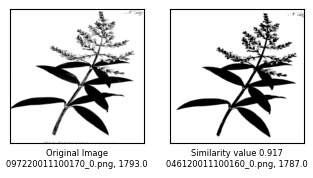

Plotting similar images for 049130040003650_0.png


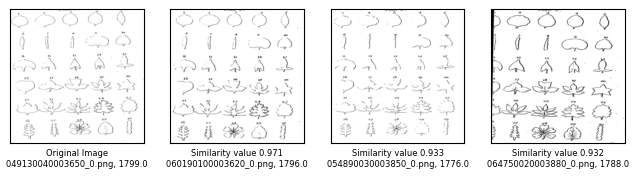

Plotting similar images for 054920030000510_0.png


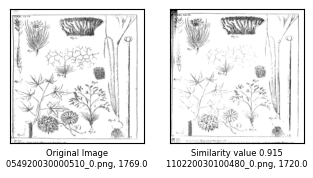

Plotting similar images for 054920020003280_0.png


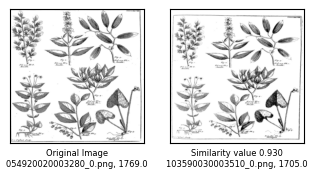

Plotting similar images for 110230010603190_0.png


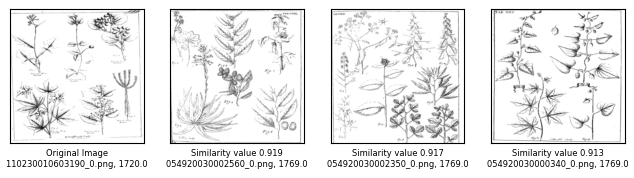

In [24]:
# examine some images

for ix in df91.sample(10)["original_image"]:
    print("Plotting similar images for" , ix)
    plotImages(ix,inputDir,df91)

This quick check shows that not all results are perfect, but the quality is good enough to continue.


Next, I wanted to arrange the pictures so that the earlier one in each match is the original picture, and the similar image is the one published later. There might be a faster way of doing this, but I used a loop: 

In [25]:
# make a new dataframe where the earlier year is always work_id, and the reuse work_id_2

df2 = pd.DataFrame()

col_1= ["original_image", 'page_id', 'ecco_id',
       'work_id', 'ecco_full_title', 'gatherings', 'publication_year',
       'publication_decade', 'document_type', 'authors', 'sub_category']
col_2=["similar_image",'page_id_2', 'ecco_id_2', 'work_id_2', 'ecco_full_title_2',
       'gatherings_2', 'publication_year_2', 'publication_decade_2',
       'document_type_2', 'authors_2', 'sub_category_2']
col_dict1= {c1:c2 for c1,c2 in zip(col_1,col_2)}
col_dict2={c2:c1 for c1,c2 in zip(col_1,col_2)}
col_dict = {**col_dict1,**col_dict2}


# loop the df

for i in range(len(df91)):
    row = df91.iloc[i]
    y1 = row["publication_year"]
    y2 = row["publication_year_2"]
    temp=pd.DataFrame(row).T 
    if y1> y2: 
        # rename columns if the reuse is spotted the wrong way
        temp=temp.rename(columns=col_dict)
        df2 = pd.concat([df2,temp])
    else:
        df2 = pd.concat([df2,temp])

In [26]:
# drop potential duplicates that were created when reordering the reuse
df2 =df2.drop_duplicates(["original_image","similar_image"])

In [27]:
# now, I can group by the original image to trace those work/pic ids that have been reused the most:

print("Work ids that have the most reused pictures")
print(df2.groupby(["work_id"])["similar_image"].nunique().sort_values(ascending=False).head(10))


Work ids that have the most reused pictures
work_id
158152-leonardi plukenetii md opera omnia botanica in sex tomos divisa viz i ii iii phytographia iv almagestum botanicum v almagesti botanici mantissa vi amaltheum botanicum                                                                                                                                                   136
158151-leonardi plukenetii amaltheum botanicum ie stirpium indicarum alterum copiae cornu millenas ad minimum and bis centum diversas species novas and indictas nominatim comprehendens quarum sexcenae and insuper selectis iconibus aeneisque tabulis in gratiam phytosophorum exquisite and summo artificio illustrantur    110
8252-plantarum historiae universalis oxoniensis pars tertia seu herbarum distributio nova per tabulas cognationis and affinitatis ex libro naturae observata and detecta                                                                                                                                    

In [61]:
print("Work ids that have been used in the biggest number of *different* publications")
print(df2.groupby(["work_id"])["work_id_2"].nunique().sort_values(ascending=False).head(10))


Work ids that have been used in the biggest number of *different* publications
work_id
8252-plantarum historiae universalis oxoniensis pars tertia seu herbarum distributio nova per tabulas cognationis and affinitatis ex libro naturae observata and detecta                                                                                                                                                        15
22710-vegetable system or series of experiments and observations tending to explain internal structure and life of plants                                                                                                                                                                                                       11
158152-leonardi plukenetii md opera omnia botanica in sex tomos divisa viz i ii iii phytographia iv almagestum botanicum v almagesti botanici mantissa vi amaltheum botanicum                                                                                              

In [30]:
print("The pictures that have been copied the most")
print(df2.groupby(["original_image"]).size().sort_values(ascending=False).head(10))


The pictures that have been copied the most
original_image
049030010306840_3.png    6
065020090000690_0.png    5
049030010207390_4.png    5
099320011301010_0.png    4
049030010203800_3.png    4
049030010207340_2.png    4
082460030003900_0.png    4
049030010207390_3.png    4
049030010203770_3.png    4
110950030000550_5.png    4
dtype: int64


I wanted to have a closer look to these top pictures:


plotting image 049030010306840_3.png from 8252-plantarum historiae universalis oxoniensis pars tertia seu herbarum distributio nova per tabulas cognationis and affinitatis ex libro naturae observata and detecta 
by Morison, Robert, 1620-1683.


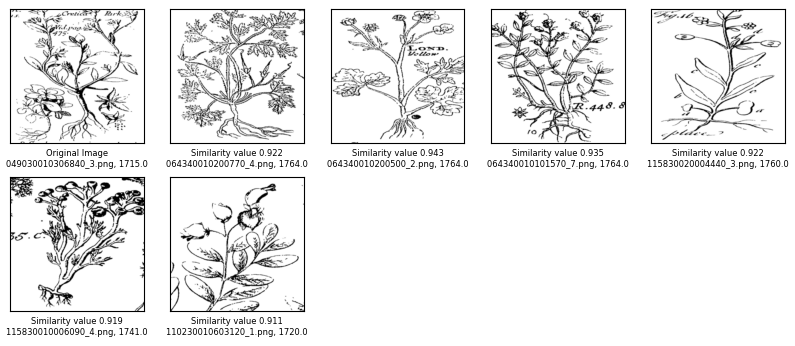

plotting image 065020090000690_0.png from X-T127734 
by nan


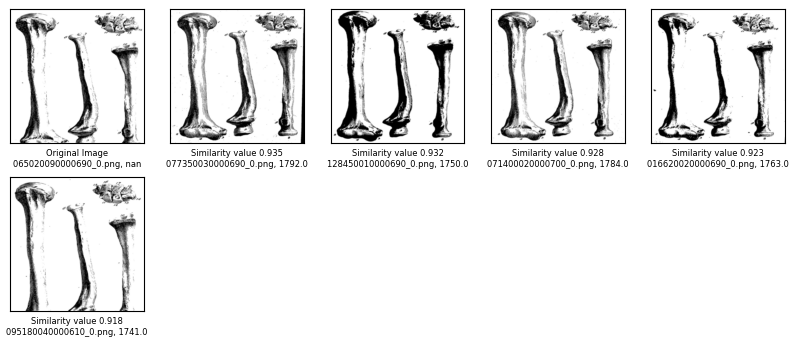

plotting image 049030010207390_4.png from 8252-plantarum historiae universalis oxoniensis pars tertia seu herbarum distributio nova per tabulas cognationis and affinitatis ex libro naturae observata and detecta 
by Morison, Robert, 1620-1683.


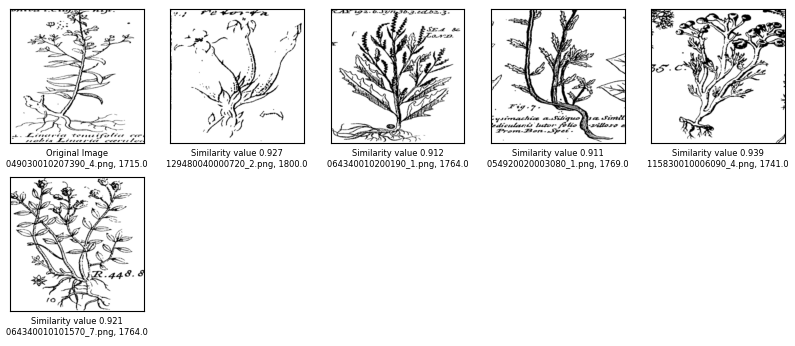

plotting image 099320011301010_0.png from 22710-vegetable system or series of experiments and observations tending to explain internal structure and life of plants 
by Hill, John, 1714?-1775.


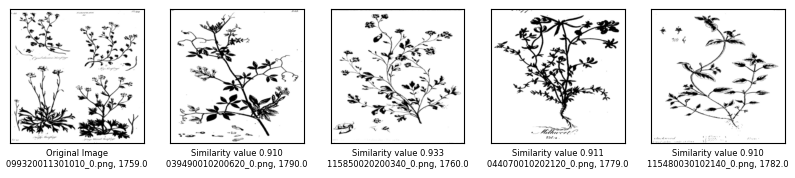

plotting image 049030010203800_3.png from 8252-plantarum historiae universalis oxoniensis pars tertia seu herbarum distributio nova per tabulas cognationis and affinitatis ex libro naturae observata and detecta 
by Morison, Robert, 1620-1683.


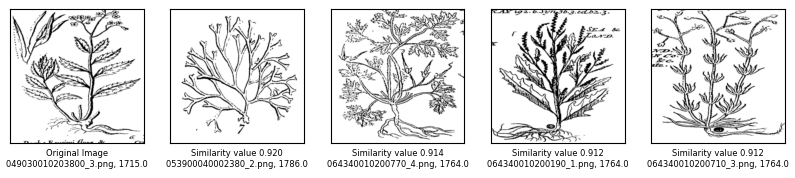

plotting image 049030010207340_2.png from 8252-plantarum historiae universalis oxoniensis pars tertia seu herbarum distributio nova per tabulas cognationis and affinitatis ex libro naturae observata and detecta 
by Morison, Robert, 1620-1683.


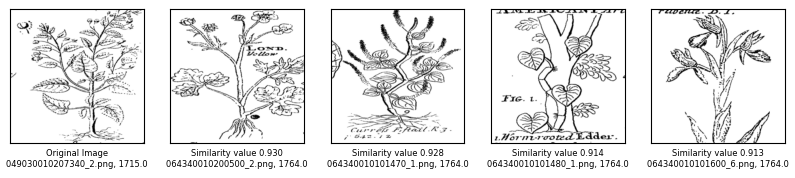

plotting image 082460030003900_0.png from 211-english physitian enlarged with three hundred sixty and nine medicines made of english herbs that were not in any impression until this 
by Culpeper, Nicholas, 1616-1654.


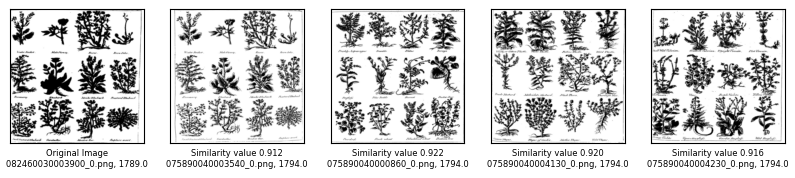

plotting image 049030010207390_3.png from 8252-plantarum historiae universalis oxoniensis pars tertia seu herbarum distributio nova per tabulas cognationis and affinitatis ex libro naturae observata and detecta 
by Morison, Robert, 1620-1683.


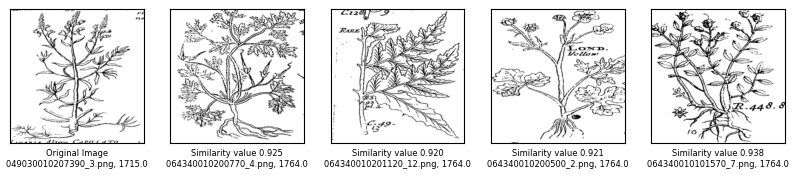

plotting image 049030010203770_3.png from 8252-plantarum historiae universalis oxoniensis pars tertia seu herbarum distributio nova per tabulas cognationis and affinitatis ex libro naturae observata and detecta 
by Morison, Robert, 1620-1683.


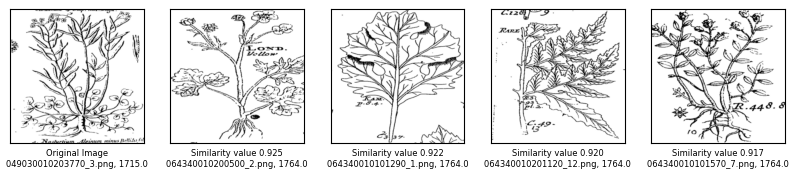

plotting image 110950030000550_5.png from 2260-gazophylacium naturae and artis 
by Petiver, James, 1663 or 1664-1718.


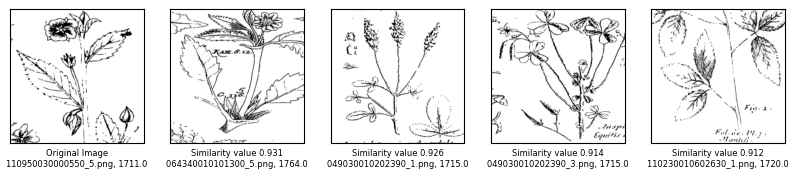

In [31]:

for ix in df2.groupby(["original_image"]).size().sort_values(ascending=False).head(10).index:
    book=df2[df2["original_image"]==ix]["work_id"].iloc[0]
    author=df2[df2["original_image"]==ix]["authors"].iloc[0]
    print("plotting image", str(ix), "from" ,book, "\nby", author)
    plotImages(ix,inputDir,df2)

Although not all of these matches stem from real reuse of the original picture, some observations can be made from the data.

- Cases related to Leonard Plukenet are reprints of his own work published in 1705, 1720, and 1769.
    - which explains the big reuse numbers, as whole books were reprinted.
- What is remarkable is that the first publications were published in folio, and the later ones in quarto, requiring new printing plates.
- Moreover, he lived in 1642 - 1706, so it is noticeable that his works were reprinted almost 100 years later.

In [38]:
#pic="103590030003260_0.png"
df2[df2["authors"]=="Plukenet, Leonard, 1642-1706."][["ecco_id", "publication_year","gatherings", "ecco_id_2","authors_2","publication_year_2","gatherings_2"]].drop_duplicates().sort_values("publication_year")

ecco_id publication_year gatherings   ecco_id_2   
6     1035900300           1705.0        2fo  1102300106  \
864   1035900300           1705.0        2fo  0549200300   
464   1035900300           1705.0        2fo  0490300102   
324   1035900300           1705.0        2fo  0485900500   
4204  1035900300           1705.0        2fo  0490300103   
7     1035900300           1705.0        2fo  0549200200   
39    1035900300           1705.0        2fo  1102200305   
2069  1102200301           1720.0        NaN  0549200200   
1053  1102300106           1720.0        NaN  0643400101   
526   1102200303           1720.0        NaN  0549200200   
27    1102200301           1720.0        NaN  0549200300   
63    1102300106           1720.0        NaN  0549200200   
213   1102200305           1720.0        NaN  0485900500   
139   1102200303           1720.0        NaN  0549200300   
94    1102200305           1720.0        NaN  1294800400   
79    1102200302           1720.0        NaN  0549200300   
65    1102200305           1720.0        NaN  0549200300   
486   1102300106           1720.0        NaN  0549200300   
2180  0549200300           1769.0        4to  0317500104   
3180  0549200200           1769.0        4to  0549200300   
3435  0549200300           1769.0        4to  0549200200   

                               authors_2 publication_year_2 gatherings_2  
6          Plukenet, Leonard, 1642-1706.             1720.0          NaN  
864        Plukenet, Leonard, 1642-1706.             1769.0          4to  
464          Morison, Robert, 1620-1683.             1715.0          2fo  
324        Plukenet, Leonard, 1642-1706.             1769.0          4to  
4204         Morison, Robert, 1620-1683.             1715.0          2fo  
7          Plukenet, Leonard, 1642-1706.             1769.0          4to  
39         Plukenet, Leonard, 1642-1706.             1720.0          NaN  
2069       Plukenet, Leonard, 1642-1706.             1769.0          4to  
1053  Petiver, James, 1663 or 1664-1718.             1764.0          NaN  
526        Plukenet, Leonard, 1642-1706.             1769.0          4to  
27         Plukenet, Leonard, 1642-1706.             1769.0          4to  
63         Plukenet, Leonard, 1642-1706.             1769.0          4to  
213        Plukenet, Leonard, 1642-1706.             1769.0          4to  
139        Plukenet, Leonard, 1642-1706.             1769.0          4to  
94            Struve, Jacobus Bernardus.             1800.0          4to  
79         Plukenet, Leonard, 1642-1706.             1769.0          4to  
65         Plukenet, Leonard, 1642-1706.             1769.0          4to  
486        Plukenet, Leonard, 1642-1706.             1769.0          4to  
2180          Aublet, Fusée, 1720-1778.             1775.0          4to  
3180       Plukenet, Leonard, 1642-1706.             1769.0          4to  
3435       Plukenet, Leonard, 1642-1706.             1769.0          4to

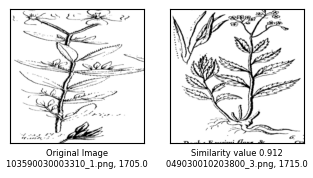

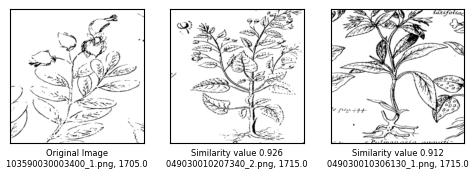

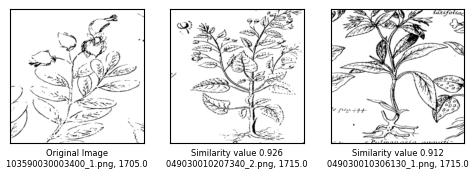

In [45]:
# Has Morison reused Plukenet or
petiver= "Petiver, James, 1663 or 1664-1718."
morison="Morison, Robert, 1620-1683."
plukenet="Plukenet, Leonard, 1642-1706."
plukenetiMorison=df2[(df2["authors"]==plukenet)&(df2["authors_2"]==morison)]
plukenetiMorison

for original in plukenetiMorison["original_image"]:
    plotImages(original,inputDir,plukenetiMorison)

The data does not contain cases of direct copies.

## Part 2 Exploration of image reuse across publication formats

plotting image from author: nan , published in format nan
reuse by author: nan , format: nan


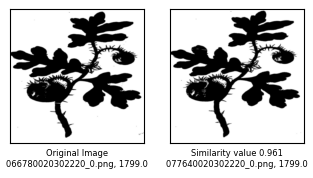

plotting image from author: nan , published in format nan
reuse by author: nan , format: 12mo


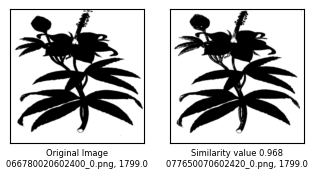

plotting image from author: nan , published in format nan
reuse by author: nan , format: nan


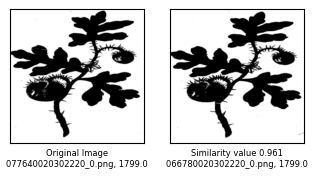

plotting image from author: Plukenet, Leonard, 1642-1706. , published in format 2fo
reuse by author: Plukenet, Leonard, 1642-1706. , format: 4to
reuse by author: Plukenet, Leonard, 1642-1706. , format: nan


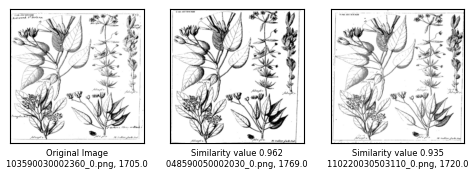

plotting image from author: Plukenet, Leonard, 1642-1706. , published in format 2fo
reuse by author: Plukenet, Leonard, 1642-1706. , format: 4to
reuse by author: Plukenet, Leonard, 1642-1706. , format: nan


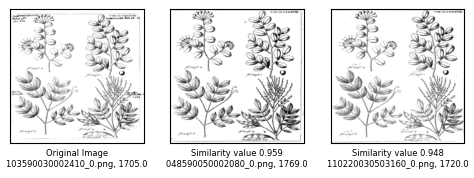

plotting image from author: Plukenet, Leonard, 1642-1706. , published in format 2fo
reuse by author: Plukenet, Leonard, 1642-1706. , format: nan
reuse by author: Plukenet, Leonard, 1642-1706. , format: 4to


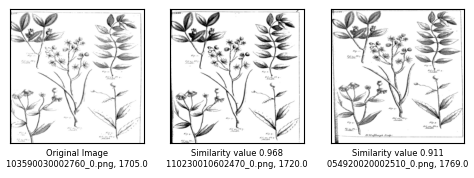

plotting image from author: Plukenet, Leonard, 1642-1706. , published in format 2fo
reuse by author: Plukenet, Leonard, 1642-1706. , format: nan
reuse by author: Plukenet, Leonard, 1642-1706. , format: 4to


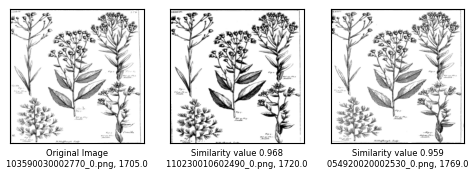

plotting image from author: Plukenet, Leonard, 1642-1706. , published in format 2fo
reuse by author: Plukenet, Leonard, 1642-1706. , format: 4to
reuse by author: Plukenet, Leonard, 1642-1706. , format: nan


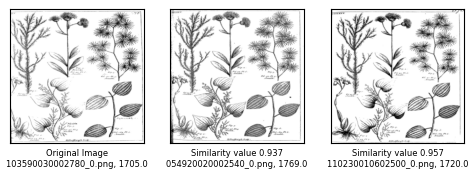

plotting image from author: Plukenet, Leonard, 1642-1706. , published in format 2fo
reuse by author: Plukenet, Leonard, 1642-1706. , format: 4to
reuse by author: Plukenet, Leonard, 1642-1706. , format: nan


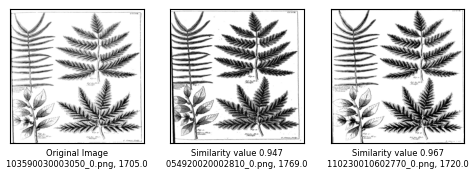

plotting image from author: Plukenet, Leonard, 1642-1706. , published in format 2fo
reuse by author: Plukenet, Leonard, 1642-1706. , format: nan
reuse by author: Plukenet, Leonard, 1642-1706. , format: 4to


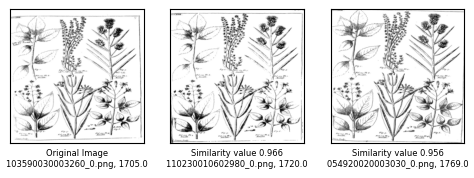

plotting image from author: Plukenet, Leonard, 1642-1706. , published in format 2fo
reuse by author: Plukenet, Leonard, 1642-1706. , format: 4to
reuse by author: Plukenet, Leonard, 1642-1706. , format: nan


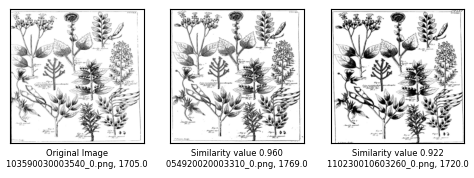

plotting image from author: Plukenet, Leonard, 1642-1706. , published in format nan
reuse by author: Plukenet, Leonard, 1642-1706. , format: 4to
reuse by author: Plukenet, Leonard, 1642-1706. , format: 4to


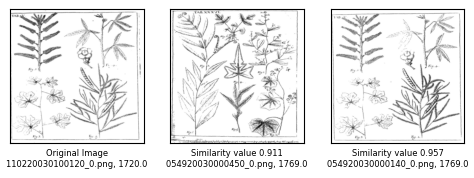

plotting image from author: Plukenet, Leonard, 1642-1706. , published in format nan
reuse by author: Plukenet, Leonard, 1642-1706. , format: 4to


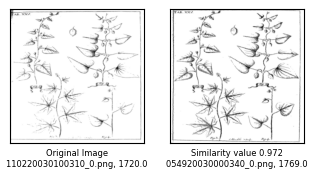

plotting image from author: Plukenet, Leonard, 1642-1706. , published in format nan
reuse by author: Plukenet, Leonard, 1642-1706. , format: 4to


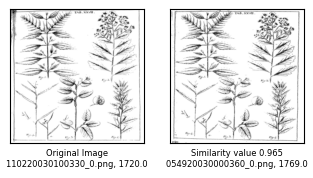

plotting image from author: Plukenet, Leonard, 1642-1706. , published in format nan
reuse by author: Plukenet, Leonard, 1642-1706. , format: 4to


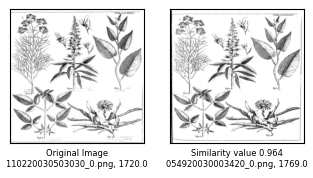

plotting image from author: Plukenet, Leonard, 1642-1706. , published in format nan
reuse by author: Plukenet, Leonard, 1642-1706. , format: 4to


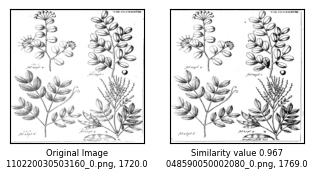

plotting image from author: Plukenet, Leonard, 1642-1706. , published in format nan
reuse by author: Plukenet, Leonard, 1642-1706. , format: 4to


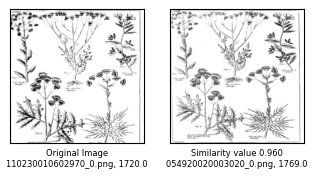

plotting image from author: Petiver, James, 1663 or 1664-1718. , published in format 2fo
reuse by author: Petiver, James, 1663 or 1664-1718. , format: nan


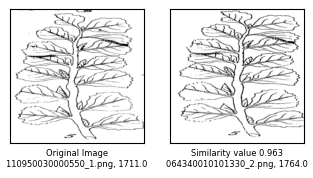

plotting image from author: Petiver, James, 1663 or 1664-1718. , published in format 2fo
reuse by author: Petiver, James, 1663 or 1664-1718. , format: nan


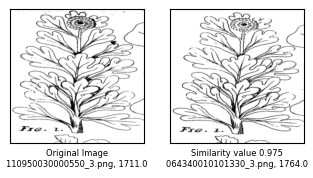

plotting image from author: Petiver, James, 1663 or 1664-1718. , published in format 2fo
reuse by author: Petiver, James, 1663 or 1664-1718. , format: nan


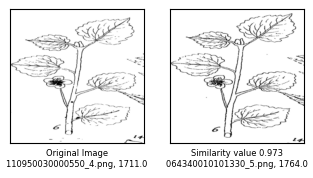

In [46]:
# accross formats
df_format= df2[df2["gatherings"]!=df2["gatherings_2"]] # the format is not the same
df_format = df_format[df_format["document_type"] !="pamphlet"]
#df_format =df_format[df_format["publication_year"] <=df_format["publication_year_2"]]

# sort by similarity score

sort_column="similarity_score"
sim_imgs=df_format.sort_values([sort_column],ascending=False).drop_duplicates("original_image").head(20).groupby("original_image")["similar_image"].apply(list)
orig_img=df_format.sort_values([sort_column],ascending=False).drop_duplicates("original_image").head(20).groupby("original_image")["original_image"].apply(list)
for o, s in zip(orig_img, sim_imgs):
    
    # print the work id
    book= df_format[df_format["original_image"]==o[0]]["work_id"].iloc[0]
    col="work_id_2"
    # alternatively print the author
    book= df_format[df_format["original_image"]==o[0]]["authors"].iloc[0]
    col="authors_2"
    
    #booknumber = df_format[df_format["original_image"]==o[0]]["n_reuse"].iloc[0]
    book_format = df_format[df_format["original_image"]==o[0]]["gatherings"].iloc[0]
    y = df_format[df_format["original_image"]==o[0]]["publication_year"].iloc[0]
    image = o[0]#row["original_image"]
    print("plotting image from author:", str(book), ", published in format", str(book_format))
    
    for s_id, f in zip(df_format[df_format["original_image"]==o[0]][col],df_format[df_format["original_image"]==o[0]]["gatherings_2"]):
        print("reuse by author:", s_id, ", format:", f)
    
    plotImages(image,inputDir,df_format)

As we found out during the hackathon, the octavo format became more popular towards the end of the century. Therefore, I wanted to check if there are images that were first published in another size, then in octavo

plotting image from 8252-plantarum historiae universalis oxoniensis pars tertia seu herbarum distributio nova per tabulas cognationis and affinitatis ex libro naturae observata and detecta in format 2fo
reuse in: 105904-english botany 8vo


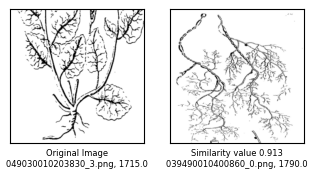

plotting image from 8252-plantarum historiae universalis oxoniensis pars tertia seu herbarum distributio nova per tabulas cognationis and affinitatis ex libro naturae observata and detecta in format 2fo
reuse in: 14466-useful family herbal or account of all those english plants which are remarkable for their virtues and of drugs which are produced by vegetables of other countries 8vo


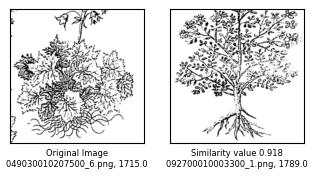

plotting image from 8252-plantarum historiae universalis oxoniensis pars tertia seu herbarum distributio nova per tabulas cognationis and affinitatis ex libro naturae observata and detecta in format 2fo
reuse in: 2860-essays relating to agriculture and rural affairs 8vo


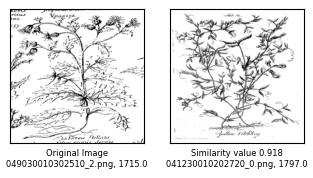

plotting image from 8252-plantarum historiae universalis oxoniensis pars tertia seu herbarum distributio nova per tabulas cognationis and affinitatis ex libro naturae observata and detecta in format 2fo
reuse in: 782-gardeners kalendar directing what works are necessary to be done every month in kitchen fruit and pleasure garden and in conservatory 8vo


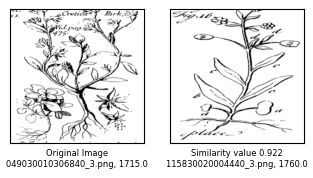

plotting image from X-T148719 in format nan
reuse in: 21399-memoirs of medical society of london instituted in year 1773 vol i 8vo


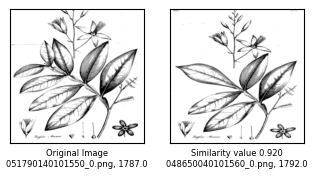

plotting image from 13834-a new medical dictionary or general repository of physic in format 2fo
reuse in: 6871-an introduction to botany containing explanation of theory of that science extracted from works of 8vo


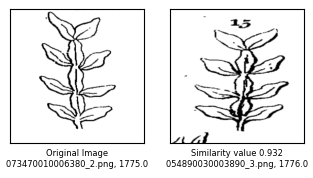

plotting image from 211-english physitian enlarged with three hundred sixty and nine medicines made of english herbs that were not in any impression until this in format 4to
reuse in: 84909-a complete herbal of james newton m 8vo


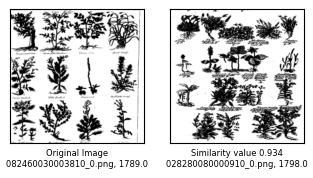

plotting image from X-T83980 in format 2fo
reuse in: 159155-an abridgement of flora londinensis with reduced plates 8vo
reuse in: 211-english physitian enlarged with three hundred sixty and nine medicines made of english herbs that were not in any impression until this 8vo


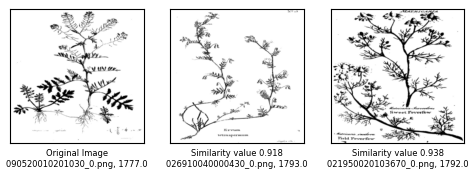

plotting image from 22710-vegetable system or series of experiments and observations tending to explain internal structure and life of plants in format 2fo
reuse in: 22711-virtues of british herbs with history description and figures of several kinds account of diseases they will cure method of giving them and management of patients in each disease containing cures of head-achs by feverfew tea with two singular instances 8vo


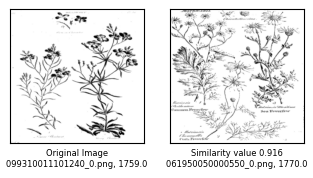

plotting image from 22710-vegetable system or series of experiments and observations tending to explain internal structure and life of plants in format 2fo
reuse in: 159155-an abridgement of flora londinensis with reduced plates 8vo


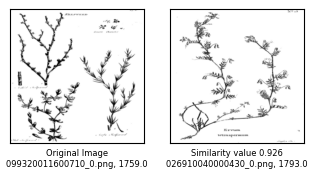

plotting image from 22710-vegetable system or series of experiments and observations tending to explain internal structure and life of plants in format 2fo
reuse in: X-the compleat herbal; or, family physician 8vo


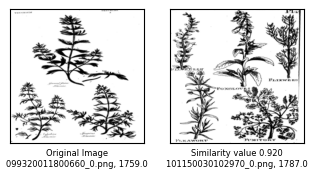

plotting image from 44217-micrographia illustrata or knowledge of microscope explaind together with account of new invented universal single or double microscope either of which is capable of being applied to improvd solar apparatus in format 4to
reuse in: 101136-micrographia illustrata or microscope explained in several new inventions particularly of new variable microscope for examining all sorts of minute objects and also of new camera obscura microscope designed for drawing all minute objects either by light of sun or by lamp in winter evenings to great perfection with description of all other microscopes now in use 8vo


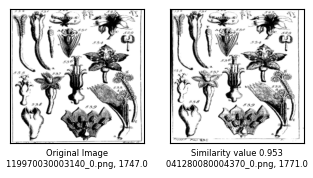

In [47]:
#cases from sth to 8vo?

df_format=df2[df2["gatherings"]!=df2["gatherings_2"]]
df_format=df_format[df_format["gatherings_2"]=="8vo"]
df_format =df_format[df_format["publication_year"] <=df_format["publication_year_2"]]


sort_column=["similarity_score"]
sim_imgs=df_format.sort_values(sort_column,ascending=False).drop_duplicates("work_id_2").head(20).groupby("original_image")["similar_image"].apply(list)
orig_img=df_format.sort_values(sort_column,ascending=False).drop_duplicates("work_id_2").head(20).groupby("original_image")["original_image"].apply(list)

for o, s in zip(orig_img, sim_imgs):
    book= df_format[df_format["original_image"]==o[0]]["work_id"].iloc[0]
    #booknumber = df_format[df_format["original_image"]==o[0]]["n_reuse"].iloc[0]
    book_format = df_format[df_format["original_image"]==o[0]]["gatherings"].iloc[0]
    y = df_format[df_format["original_image"]==o[0]]["publication_year"].iloc[0]
    image = o[0]
    print("plotting image from", str(book), "in format", str(book_format))
    for s_id, f in zip(df_format[df_format["original_image"]==o[0]]["work_id_2"],df_format[df_format["original_image"]==o[0]]["gatherings_2"]):
        print("reuse in:", s_id, f)
    
    plotImages(image,inputDir,df_format)

In [55]:
# just to get an idea of the names and titles, print the different work ids and authors
pd.set_option('max_colwidth', 80)
df_format[["ecco_full_title","ecco_full_title_2"]].sort_values("ecco_full_title").drop_duplicates()

ecco_full_title   
1355  A curious herbal, containing five hundred cuts, of the most useful plants, w...  \
1989  A new medical dictionary; or, general repository of physic. Containing an ex...   
768   Culpeper's English physician; and complete herbal. To which are now first ad...   
3884  Flora Londinensis: or plates and descriptions of such plants as grow wild in...   
1336  Flora Londinensis: or plates and descriptions of such plants as grow wild in...   
326    Memoirs of the Medical Society of London. Instituted in the year 1773. Vol. I.   
225   Micrographia illustrata, or, the knowledge of the microscope explain'd: toge...   
52    Micrographia illustrata, or, the knowledge of the microscope explain'd: toge...   
3332  Plantarum historiae universalis Oxoniensis seu herbarum distributio nova, pe...   
1777  Plantarum historiae universalis Oxoniensis seu herbarum distributio nova, pe...   
1199  Plantarum historiae universalis Oxoniensis seu herbarum distributio nova, pe...   
598   Plantarum historiae universalis Oxoniensis seu herbarum distributio nova, pe...   
2431  The British herbal: an history of plants and trees, natives of Britain, cult...   
2893  The British herbal: an history of plants and trees, natives of Britain, cult...   
1490  The vegetable system. Or, a series of experiments, and observations tending ...   
1156  The vegetable system. Or, a series of experiments, and observations tending ...   
1014  The vegetable system. Or, a series of experiments, and observations tending ...   
920   The vegetable system. Or, a series of experiments, and observations tending ...   
4365  The vegetable system. Or, a series of experiments, and observations tending ...   
4533  The vegetable system. Or, a series of experiments, and observations tending ...   

                                                                    ecco_full_title_2  
1355  Culpeper's English family physician; or, medical herbal enlarged, with sever...  
1989  An introduction to botany. Containing an explanation of the theory of that s...  
768   A complete herbal of the late James Newton, M.D. Containing the prints and t...  
3884                     An abridgement of the Flora londinensis with reduced plates.  
1336  Culpeper's English family physician; or, medical herbal enlarged, with sever...  
326    Memoirs of the Medical Society of London. Instituted in the year 1773. Vol. I.  
225   Micrographia illustrata: or the microscope explained, in several new inventi...  
52    Micrographia illustrata: or the microscope explained, in several new inventi...  
3332  The gardeners kalendar; directing what works are necessary to be performed e...  
1777  English botany; or, coloured figures of British plants, with their essential...  
1199  The useful family-herbal; or, an account of all those English plants which a...  
598   Essays relating to agriculture and rural affairs. The fourth edition, with c...  
2431  Culpeper's English family physician; or, medical herbal enlarged, with sever...  
2893  A complete herbal of the late James Newton, M.D. Containing the prints and t...  
1490  Culpeper's English family physician; or, medical herbal enlarged, with sever...  
1156  Virtues of British herbs. With the history, description, and figures of the ...  
1014  The compleat herbal; or, family physician. Giving an account of all such pla...  
920                      An abridgement of the Flora londinensis with reduced plates.  
4365  English botany; or, coloured figures of British plants, with their essential...  
4533  Essays relating to agriculture and rural affairs. ... . The third edition, w...

In [56]:
# co-occurrence
# Create a mapping of unique names to numerical labels
df3 = df_format
# Count co-occurrences of the two columns
co_occurrences = df3.groupby(['work_id', 'work_id_2']).size().reset_index(name='count')

#print(co_occurrences)
co_occurrences.sort_values(by="count", ascending=False)

work_id   
14  8252-plantarum historiae universalis oxoniensis pars tertia seu herbarum dis...  \
10  44217-micrographia illustrata or knowledge of microscope explaind together w...   
17                                                                         X-T83980   
6   22710-vegetable system or series of experiments and observations tending to ...   
1   111468-british herbal history of plants and trees natives of britain cultiva...   
0   111468-british herbal history of plants and trees natives of britain cultiva...   
11  8252-plantarum historiae universalis oxoniensis pars tertia seu herbarum dis...   
16                                                                        X-T148719   
15  8933-a curious herbal containing five hundred cuts of most useful plants whi...   
13  8252-plantarum historiae universalis oxoniensis pars tertia seu herbarum dis...   
12  8252-plantarum historiae universalis oxoniensis pars tertia seu herbarum dis...   
9   22710-vegetable system or series of experiments and observations tending to ...   
8   22710-vegetable system or series of experiments and observations tending to ...   
7   22710-vegetable system or series of experiments and observations tending to ...   
5   22710-vegetable system or series of experiments and observations tending to ...   
4   22710-vegetable system or series of experiments and observations tending to ...   
3   211-english physitian enlarged with three hundred sixty and nine medicines m...   
2                    13834-a new medical dictionary or general repository of physic   
18                                                                         X-T83980   

                                                                          work_id_2   
14  782-gardeners kalendar directing what works are necessary to be done every m...  \
10  101136-micrographia illustrata or microscope explained in several new invent...   
17                   159155-an abridgement of flora londinensis with reduced plates   
6   211-english physitian enlarged with three hundred sixty and nine medicines m...   
1                                         84909-a complete herbal of james newton m   
0   211-english physitian enlarged with three hundred sixty and nine medicines m...   
11                                                            105904-english botany   
16         21399-memoirs of medical society of london instituted in year 1773 vol i   
15  211-english physitian enlarged with three hundred sixty and nine medicines m...   
13                            2860-essays relating to agriculture and rural affairs   
12  14466-useful family herbal or account of all those english plants which are ...   
9                                       X-the compleat herbal; or, family physician   
8                             2860-essays relating to agriculture and rural affairs   
7   22711-virtues of british herbs with history description and figures of sever...   
5                    159155-an abridgement of flora londinensis with reduced plates   
4                                                             105904-english botany   
3                                         84909-a complete herbal of james newton m   
2   6871-an introduction to botany containing explanation of theory of that scie...   
18  211-english physitian enlarged with three hundred sixty and nine medicines m...   

    count  
14      4  
10      4  
17      2  
6       2  
1       2  
0       1  
11      1  
16      1  
15      1  
13      1  
12      1  
9       1  
8       1  
7       1  
5       1  
4       1  
3       1  
2       1  
18      1

This co-occurrence df shows that plantarum historiae and vegetable system have been used the most diversely in different other works.
Let's check this next.

In [57]:
co_occurrences.groupby("work_id").size().sort_values(ascending=False).head()

work_id
22710-vegetable system or series of experiments and observations tending to explain internal structure and life of plants                                                   6
8252-plantarum historiae universalis oxoniensis pars tertia seu herbarum distributio nova per tabulas cognationis and affinitatis ex libro naturae observata and detecta    4
111468-british herbal history of plants and trees natives of britain cultivated for use or raised for beauty                                                                2
X-T83980                                                                                                                                                                    2
13834-a new medical dictionary or general repository of physic                                                                                                              1
dtype: int64

In [58]:
# print correlation from data

vege_system ="22710-vegetable system or series of experiments and observations tending to explain internal structure and life of plants"
plantarum_historiae="8252-plantarum historiae universalis oxoniensis pars tertia seu herbarum distributio nova per tabulas cognationis and affinitatis ex libro naturae observata and detecta"
vs_df=df_format[df_format["work_id"]==vege_system]
ph_df=df_format[df_format["work_id"]==plantarum_historiae]


display(meta[meta["work_id"]==vege_system].head(1)) # John Hill, 1759
display(meta[meta["work_id"]==plantarum_historiae].head(1)) # Robert Morison, 1715

page_id     ecco_id  page_number       caption_texts estc_id   
60  099320011701220  0993200117          122  IRONWORT#SIDERITIS  T50668  \

                                                                    ecco_full_title   
60  The vegetable system. Or, a series of experiments, and observations tending ...  \

    number_of_pages language_primary gatherings  publication_year   
60              125          English        2fo            1759.0  \

    publication_decade   
60              1750.0  \

                                                                            work_id   
60  22710-vegetable system or series of experiments and observations tending to ...  \

   publication_place publication_country document_type   
60            London             England          Book  \

                           sub_category                  authors  
60  scientificimprovementnaturalhistory  Hill, John, 1714?-1775.

page_id     ecco_id  page_number   
208  049030010100210  0490300101           21  \

                                           caption_texts estc_id   
208  Umbell Rostrat. cognationis S. affinitatis Tab. 6  N20793  \

                                                                     ecco_full_title   
208  Plantarum historiae universalis Oxoniensis seu herbarum distributio nova, pe...  \

     number_of_pages language_primary gatherings  publication_year   
208              127            Latin        2fo            1715.0  \

     publication_decade   
208              1710.0  \

                                                                             work_id   
208  8252-plantarum historiae universalis oxoniensis pars tertia seu herbarum dis...  \

    publication_place publication_country document_type   
208            Oxford             England          Book  \

                            sub_category                      authors  
208  scientificimprovementnaturalhistory  Morison, Robert, 1620-1683.

211-english physitian enlarged with three hundred sixty and nine medicines made of english herbs that were not in any impression until this Culpeper, Nicholas, 1616-1654. 1792.0


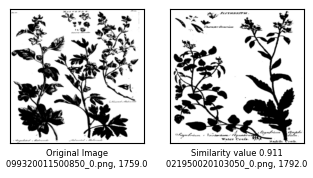

159155-an abridgement of flora londinensis with reduced plates Curtis, William, 1746-1799. 1793.0


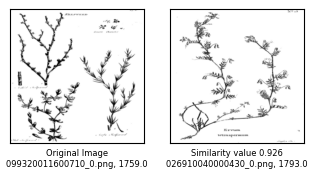

X-the compleat herbal; or, family physician nan 1787.0


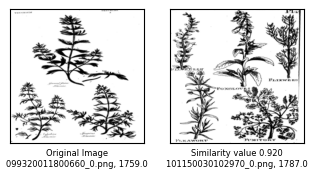

22711-virtues of british herbs with history description and figures of several kinds account of diseases they will cure method of giving them and management of patients in each disease containing cures of head-achs by feverfew tea with two singular instances Hill, John, 1714?-1775. 1770.0


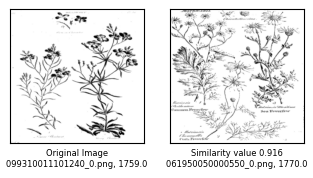

211-english physitian enlarged with three hundred sixty and nine medicines made of english herbs that were not in any impression until this Culpeper, Nicholas, 1616-1654. 1792.0


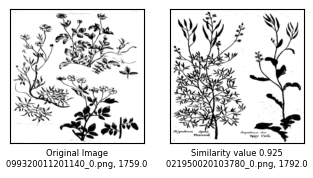

105904-english botany Smith, James Edward, Sir, 1759-1828. 1790.0


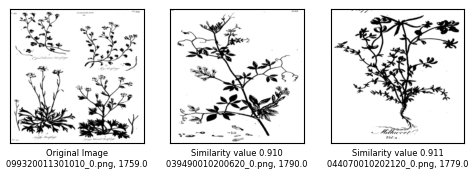

2860-essays relating to agriculture and rural affairs Anderson, James, 1739-1808. 1779.0


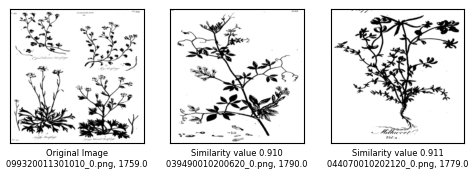

In [59]:
# print images

for i,r in vs_df.iterrows():
    image=r["original_image"]
    book=r["work_id_2"]
    author =r["authors_2"]
    year= r["publication_year_2"]
    print(book, author, year)
    plotImages(image,inputDir,vs_df)

2860-essays relating to agriculture and rural affairs Anderson, James, 1739-1808. 1797.0


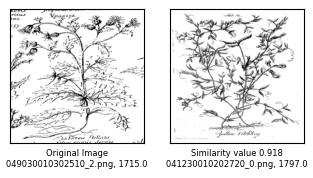

782-gardeners kalendar directing what works are necessary to be done every month in kitchen fruit and pleasure garden and in conservatory Miller, Philip, 1691-1771. 1760.0


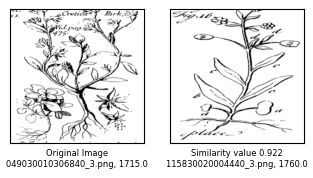

14466-useful family herbal or account of all those english plants which are remarkable for their virtues and of drugs which are produced by vegetables of other countries Hill, John, 1714?-1775. 1789.0


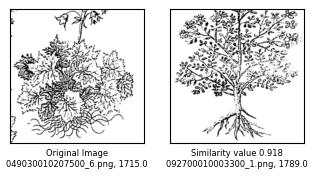

105904-english botany Smith, James Edward, Sir, 1759-1828. 1790.0


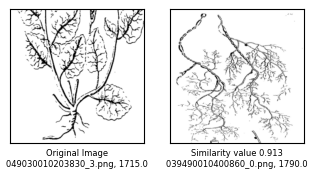

782-gardeners kalendar directing what works are necessary to be done every month in kitchen fruit and pleasure garden and in conservatory Miller, Philip, 1691-1771. 1760.0


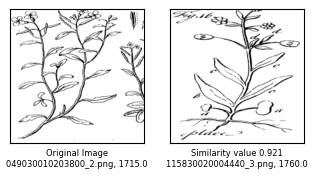

782-gardeners kalendar directing what works are necessary to be done every month in kitchen fruit and pleasure garden and in conservatory Miller, Philip, 1691-1771. 1760.0


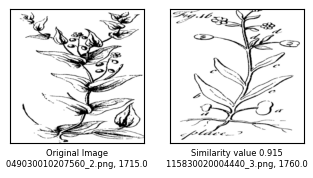

782-gardeners kalendar directing what works are necessary to be done every month in kitchen fruit and pleasure garden and in conservatory Miller, Philip, 1691-1771. 1760.0


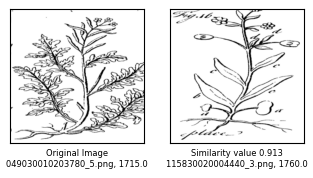

In [60]:
# print images

for i,r in ph_df.iterrows():
    image=r["original_image"]
    book=r["work_id_2"]
    author =r["authors_2"]
    year= r["publication_year_2"]
    print(book, author, year)
    plotImages(image,inputDir,ph_df)

## Part 3 